# The Sparks Foundation-Data Science & Business Analytics Internship

## Task 1 - Prediction using Supervised Machine Learning

 ● Predict the percentage of an student based on the no. of study hours. 

### Author: Prakash Nikam



###  Step 1- Importing the Libraries & Dataset

In [103]:
# Importing all libraries required in this notebook

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [104]:
# Reading data from remote link

df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")




In [105]:
# To find top five values in dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [106]:
# To find bottom five values in dataset
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [44]:
# To find number of columns and rows
df.shape


(25, 2)

In [45]:
# To find more information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [46]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [47]:
# To find null or missing values
df.isnull().sum()


Hours     0
Scores    0
dtype: int64

###  Step 2 - Visualizing the Dataset


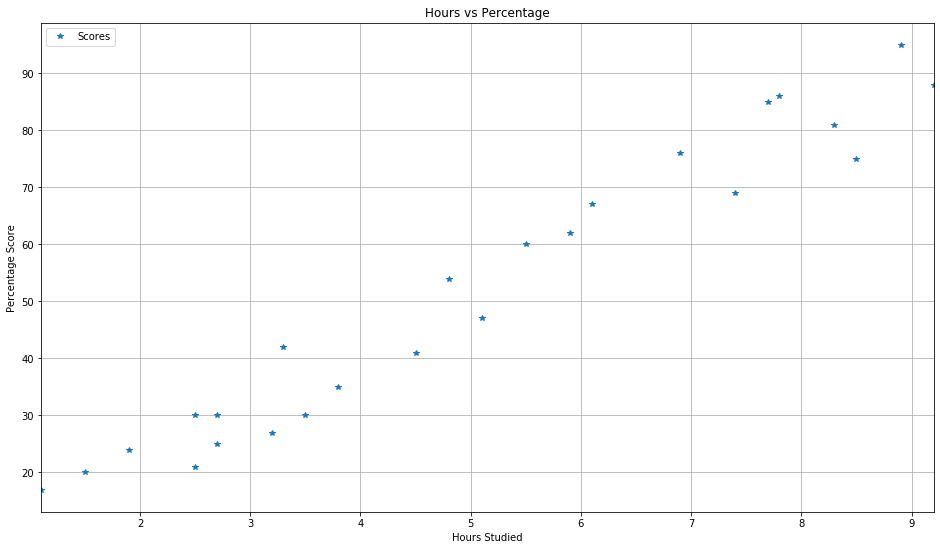

In [84]:
#Let's plot our data points on graph and see if we can manually find any relationship between the two variables
# Plotting the distribution of scores

df.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.so we can use the linear regression supervised machine model on it to predict further values.**

In [58]:
# we can also use .corr to determine the correlation between the variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Step 3 - Data Preparation

In this step we will divide the data into "attributes" (inputs) and "labels" (outputs).

In [66]:
# using iloc function we will divide the data
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1 :].values 

In [68]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [65]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method.

In [71]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

###  Step 4 - Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [72]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


### Step 5 - Visualizing the model 

after trainning the model,now its time to visualize it.

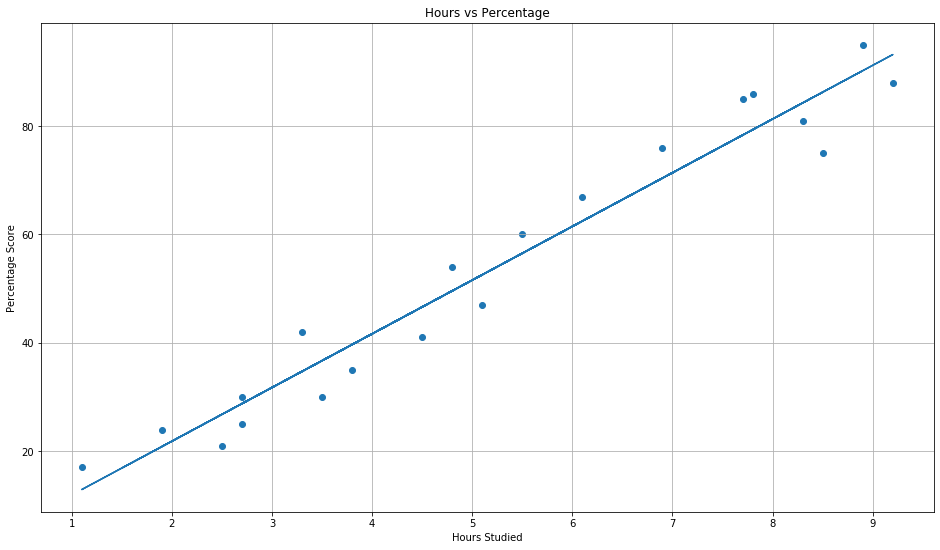

In [107]:
# Plotting the regression line

line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x_train, y_train)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.plot(x, line);
plt.grid()
plt.show()

### Step 6 - Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [90]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [92]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': [y_test],'Predicted':[y_pred]})  
df 

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [100]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [93.69173249]


### Step 7 - Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [102]:
from sklearn import metrics 

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
       

Mean Absolute Error: 4.183859899002975
